# Assessment
 We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made. An example of claim to test would be "Is the number of Bluecars taken in area X different than in area Y? Is it greater in area X than in area Z? Etc”. The selected periods of interest be either weekdays or weekends but not a mix of both. You can also consider postal codes 75015 vs 75017 to some of the areas of interest. 

To work on this project, we will perform the following analysis with Python; 

Find and deal with outliers, anomalies, and missing data within the dataset.
Plot appropriate univariate and bivariate summaries recording our observations.
Implement the solution by performing hypothesis testing.
This will need to be documented when writing the report. 

In [36]:
#Importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
auto = pd.read_csv('/content/drive/MyDrive/Week 4 IP/autolib_daily_events_postal_code.csv')
auto.tail(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16075,95880,6/10/2018,1440,6,weekend,34,32,0,0,1,0,0,0
16076,95880,6/11/2018,1440,0,weekday,17,18,0,0,0,0,0,0
16077,95880,6/12/2018,1439,1,weekday,25,25,0,0,0,0,0,0
16078,95880,6/13/2018,1440,2,weekday,12,13,0,0,1,1,0,0
16079,95880,6/14/2018,1439,3,weekday,15,13,0,0,0,0,0,0
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [38]:
#Getting familiar with the data set
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [39]:
auto.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [40]:
#The dataset has no missing values and we will convert the date collum to datetime type
auto['date'] = pd.to_datetime(auto['date'])
auto['date']

0       2018-01-01
1       2018-01-02
2       2018-01-03
3       2018-01-04
4       2018-01-05
           ...    
16080   2018-06-15
16081   2018-06-16
16082   2018-06-17
16083   2018-06-18
16084   2018-06-19
Name: date, Length: 16085, dtype: datetime64[ns]

In [41]:
#Checking for any duplicates
auto.duplicated().sum

<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
16080    False
16081    False
16082    False
16083    False
16084    False
Length: 16085, dtype: bool>

Now that the data preparation is done we will begin the exploration and analysis.

Starting univariate plotting

Text(0.5, 1.0, 'Count of rides on weekends and weekdays')

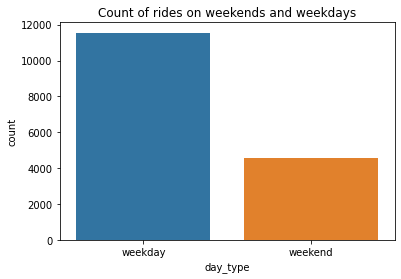

In [42]:
sns.countplot(x=auto['day_type'],data = auto)
plt.title("Count of rides on weekends and weekdays")

Text(0.5, 1.0, 'Count of entries per day of the week')

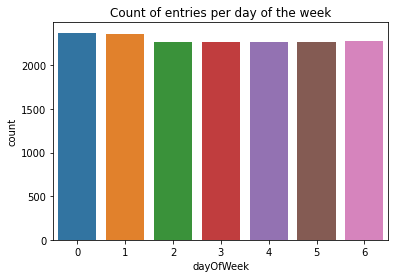

In [43]:
sns.countplot(x=auto['dayOfWeek'],data = auto)
plt.title("Count of entries per day of the week")
#to note weekends are the 5 and 6 values

Moving onto the bivariate analysis 

Text(0.5, 1.0, 'Count of Blue cars taken per day of the week')

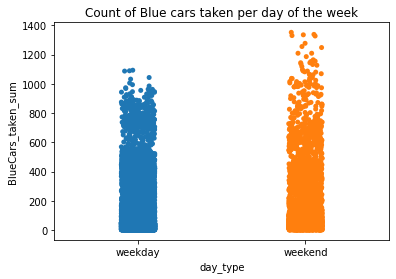

In [44]:
sns.stripplot(x=auto['day_type'], y=auto['BlueCars_taken_sum'], data = auto)
plt.title("Count of Blue cars taken per day of the week")

Text(0.5, 1.0, 'Count of Blue cars returned per day of the week')

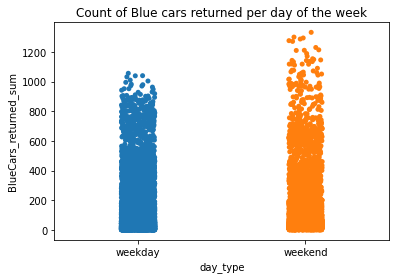

In [45]:
sns.stripplot(x=auto['day_type'], y=auto['BlueCars_returned_sum'], data = auto)
plt.title("Count of Blue cars returned per day of the week")

Text(0.5, 1.0, 'Distribution of bluecars taken per postal location')

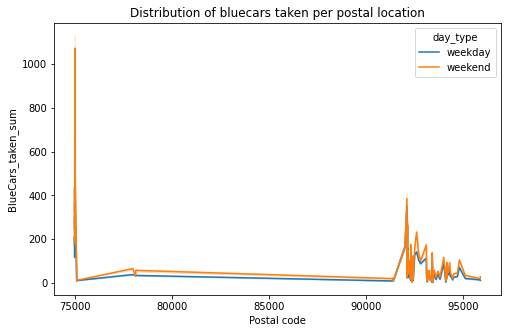

In [46]:
plt.figure(figsize=(8,5))
sns.lineplot(y=auto['BlueCars_taken_sum'],x=auto['Postal code'],data = auto, hue=auto['day_type'])
plt.title("Distribution of bluecars taken per postal location")

Text(0.5, 1.0, 'Distribution of bluecars returned per postal location')

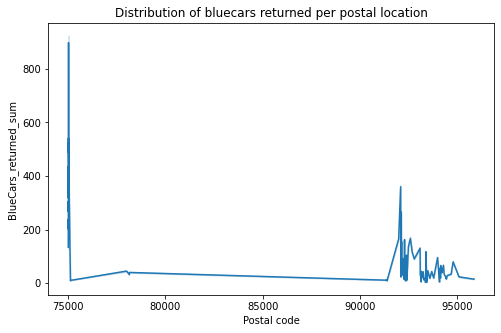

In [47]:
plt.figure(figsize=(8,5))
sns.lineplot(y=auto['BlueCars_returned_sum'],x=auto['Postal code'],data = auto)
plt.title("Distribution of bluecars returned per postal location")

<Figure size 576x1152 with 0 Axes>

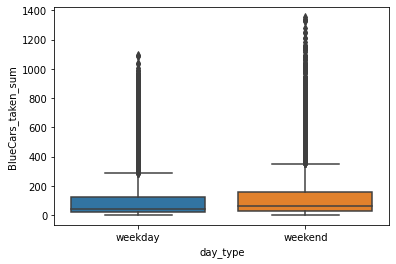

<Figure size 576x1152 with 0 Axes>

In [48]:
sns.boxplot(y =auto['BlueCars_taken_sum'], x = auto['day_type'], data = auto)
plt.figure(figsize=(8,16))

After doing the analysis and visualizations of the data i noticed most of the blue vehicles are used during the weekend. Most of the vehicles picked and returened are mostly in the postal address code 75000

# Hypothesis Testing

Moving forward we will take a sample from the data set to use in making predictions for testing our hypothesis 



In [49]:
#The first step will be to combine the two collumns for returned and taken blue car to get a total number of vehicles
auto['AllCars'] = auto['BlueCars_taken_sum'] + auto['BlueCars_returned_sum']
#this is done on the assumption the same car isnt returned to its original location
auto.head(15)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum,AllCars
0,75001,2018-01-01,1440,0,weekday,110,103,3,2,10,9,22,20,213
1,75001,2018-01-02,1438,1,weekday,98,94,1,1,8,8,23,22,192
2,75001,2018-01-03,1439,2,weekday,138,139,0,0,2,2,27,27,277
3,75001,2018-01-04,1320,3,weekday,104,104,2,2,9,8,25,21,208
4,75001,2018-01-05,1440,4,weekday,114,117,3,3,6,6,18,20,231
5,75001,2018-01-06,1437,5,weekend,187,185,6,6,7,8,38,35,372
6,75001,2018-01-07,1440,6,weekend,180,180,2,2,10,9,34,34,360
7,75001,2018-01-08,1438,0,weekday,84,83,3,3,10,10,14,15,167
8,75001,2018-01-09,1439,1,weekday,81,84,1,1,4,4,15,15,165
9,75001,2018-01-10,1440,2,weekday,88,85,5,5,11,11,23,22,173


In [50]:
#Starting the calculations
averageCars = auto['AllCars'].mean()
zscore = (200 - averageCars) / auto['AllCars'].std()
zscore

-0.1398034854454142

In [51]:
from scipy.stats import norm
prob = 1 - norm.cdf(zscore)
prob

0.5555923703215812

In [52]:
p = (prob*100)
p

55.559237032158116

The p value has been calculated to 55% which is higher than the significance level. Meaning the null hypothesis should be accepted